### Importing libraries

In [11]:
import sqlite3 #default library, no need to install
import pandas as pd
from pathlib import Path

In [12]:
database_demo_directory = 'demo'
database_directory = 'mimic-iii-clinical-database-1.4'
db = database_demo_directory

### Converting csv files to sqlite db
reference: https://www.mungingdata.com/sqlite/create-database-load-csv-python/

In [13]:
Path('mimic.db').touch()
conn = sqlite3.connect('mimic.db')
c = conn.cursor()

In [14]:
patients = pd.read_csv(f'{db}/patients.csv')
patients.columns

Index(['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag'],
      dtype='object')

### Function to create database tables from a csv file

In [30]:
NUM_ROWS = 1000

In [16]:
def create_and_populate_table_from_csv(file_name, db_name='mimic.db', num_rows=None):
    df = pd.read_csv(file_name)

    if num_rows is not None:
        df = df.head(num_rows)

    table_name = Path(file_name).stem

    Path(db_name).touch()

    conn = sqlite3.connect(db_name)
    c = conn.cursor()

    columns = ', '.join([f"{col} TEXT" for col in df.columns])
    create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({columns});"
    print(f"query for creating table: {table_name} - {create_table_query}\n")
    c.execute(create_table_query)

    for _, row in df.iterrows():
        placeholders = ', '.join(['?'] * len(row))
        insert_query = f"INSERT INTO {table_name} VALUES ({placeholders});"
        c.execute(insert_query, tuple(row))

    conn.commit()
    conn.close()


For writing queries, I just referred to the documentation of [SQLite](https://docs.python.org/3/library/sqlite3.html#how-to-register-adapter-callables)

### Query 1 
Creating all tables

In [ ]:
for file in Path(db).rglob('*.csv'):
    create_and_populate_table_from_csv(file, num_rows=NUM_ROWS) #limiting the no of rows to 1000 for demo purposes

query for creating table: PROCEDUREEVENTS_MV - CREATE TABLE IF NOT EXISTS PROCEDUREEVENTS_MV (row_id TEXT, subject_id TEXT, hadm_id TEXT, icustay_id TEXT, starttime TEXT, endtime TEXT, itemid TEXT, value TEXT, valueuom TEXT, location TEXT, locationcategory TEXT, storetime TEXT, cgid TEXT, orderid TEXT, linkorderid TEXT, ordercategoryname TEXT, secondaryordercategoryname TEXT, ordercategorydescription TEXT, isopenbag TEXT, continueinnextdept TEXT, cancelreason TEXT, statusdescription TEXT, comments_editedby TEXT, comments_canceledby TEXT, comments_date TEXT);

query for creating table: CALLOUT - CREATE TABLE IF NOT EXISTS CALLOUT (row_id TEXT, subject_id TEXT, hadm_id TEXT, submit_wardid TEXT, submit_careunit TEXT, curr_wardid TEXT, curr_careunit TEXT, callout_wardid TEXT, callout_service TEXT, request_tele TEXT, request_resp TEXT, request_cdiff TEXT, request_mrsa TEXT, request_vre TEXT, callout_status TEXT, callout_outcome TEXT, discharge_wardid TEXT, acknowledge_status TEXT, createtim

/var/folders/4v/np_9tc295nv6q1gh0_nypyfh0000gn/T/ipykernel_86104/804355690.py:2: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


query for creating table: INPUTEVENTS_CV - CREATE TABLE IF NOT EXISTS INPUTEVENTS_CV (row_id TEXT, subject_id TEXT, hadm_id TEXT, icustay_id TEXT, charttime TEXT, itemid TEXT, amount TEXT, amountuom TEXT, rate TEXT, rateuom TEXT, storetime TEXT, cgid TEXT, orderid TEXT, linkorderid TEXT, stopped TEXT, newbottle TEXT, originalamount TEXT, originalamountuom TEXT, originalroute TEXT, originalrate TEXT, originalrateuom TEXT, originalsite TEXT);

query for creating table: ADMISSIONS - CREATE TABLE IF NOT EXISTS ADMISSIONS (row_id TEXT, subject_id TEXT, hadm_id TEXT, admittime TEXT, dischtime TEXT, deathtime TEXT, admission_type TEXT, admission_location TEXT, discharge_location TEXT, insurance TEXT, language TEXT, religion TEXT, marital_status TEXT, ethnicity TEXT, edregtime TEXT, edouttime TEXT, diagnosis TEXT, hospital_expire_flag TEXT, has_chartevents_data TEXT);

query for creating table: D_LABITEMS - CREATE TABLE IF NOT EXISTS D_LABITEMS (row_id TEXT, itemid TEXT, label TEXT, fluid TEXT

/var/folders/4v/np_9tc295nv6q1gh0_nypyfh0000gn/T/ipykernel_86104/804355690.py:2: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


query for creating table: CHARTEVENTS - CREATE TABLE IF NOT EXISTS CHARTEVENTS (row_id TEXT, subject_id TEXT, hadm_id TEXT, icustay_id TEXT, itemid TEXT, charttime TEXT, storetime TEXT, cgid TEXT, value TEXT, valuenum TEXT, valueuom TEXT, warning TEXT, error TEXT, resultstatus TEXT, stopped TEXT);

query for creating table: TRANSFERS - CREATE TABLE IF NOT EXISTS TRANSFERS (row_id TEXT, subject_id TEXT, hadm_id TEXT, icustay_id TEXT, dbsource TEXT, eventtype TEXT, prev_careunit TEXT, curr_careunit TEXT, prev_wardid TEXT, curr_wardid TEXT, intime TEXT, outtime TEXT, los TEXT);

query for creating table: DIAGNOSES_ICD - CREATE TABLE IF NOT EXISTS DIAGNOSES_ICD (row_id TEXT, subject_id TEXT, hadm_id TEXT, seq_num TEXT, icd9_code TEXT);

query for creating table: SERVICES - CREATE TABLE IF NOT EXISTS SERVICES (row_id TEXT, subject_id TEXT, hadm_id TEXT, transfertime TEXT, prev_service TEXT, curr_service TEXT);

query for creating table: DRGCODES - CREATE TABLE IF NOT EXISTS DRGCODES (row_id

### Query 2
Selecting `expiry_flag` from patients table

In [25]:
expiry_flag = c.execute("SELECT expire_flag from PATIENTS")

In [26]:
expiry_flag.fetchall()

[('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 ('1',),
 

counting how many people out of admitted patients passed away (mortality rate)

In [ ]:
## get percentage of patients who have expired
mortality = c.execute("SELECT COUNT(*) FROM PATIENTS WHERE expire_flag = 1;")
mortality = mortality.fetchall()[0][0]
print(f"Total number of patients who have expired: {mortality} and the percentage is {mortality/NUM_ROWS}%"), 

Total number of patients who have expired: 200 and the percentage is 0.2*100%


(None,)

### Grouping patient admissions with ethnicity and religion

In [36]:
religions_of_patients = c.execute("SELECT religion, COUNT(religion) FROM ADMISSIONS GROUP BY religion;")
religions_of_patients.fetchall()

[(None, 0),
 ('BUDDHIST', 2),
 ('CATHOLIC', 118),
 ('CHRISTIAN SCIENTIST', 6),
 ('JEWISH', 20),
 ('MUSLIM', 4),
 ('NOT SPECIFIED', 38),
 ('OTHER', 8),
 ('PROTESTANT QUAKER', 20),
 ('ROMANIAN EAST. ORTH', 2),
 ('UNOBTAINABLE', 38)]

In [38]:
ethnicities_of_patients = c.execute("SELECT ethnicity, COUNT(ethnicity) FROM ADMISSIONS GROUP BY ethnicity;")
ethnicities_of_patients.fetchall()

[('AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 4),
 ('ASIAN', 4),
 ('BLACK/AFRICAN AMERICAN', 14),
 ('HISPANIC OR LATINO', 4),
 ('HISPANIC/LATINO - PUERTO RICAN', 30),
 ('OTHER', 6),
 ('UNABLE TO OBTAIN', 2),
 ('UNKNOWN/NOT SPECIFIED', 22),
 ('WHITE', 172)]

In [41]:
#combined query 
ethnicity_religion = c.execute("SELECT 'religion' AS category, religion AS value, COUNT(religion) AS count FROM ADMISSIONS GROUP BY religion UNION ALL SELECT 'ethnicity' AS category, ethnicity AS value, COUNT(ethnicity) AS count FROM ADMISSIONS GROUP BY ethnicity;")
ethnicity_religion.fetchall()

[('religion', None, 0),
 ('religion', 'BUDDHIST', 2),
 ('religion', 'CATHOLIC', 118),
 ('religion', 'CHRISTIAN SCIENTIST', 6),
 ('religion', 'JEWISH', 20),
 ('religion', 'MUSLIM', 4),
 ('religion', 'NOT SPECIFIED', 38),
 ('religion', 'OTHER', 8),
 ('religion', 'PROTESTANT QUAKER', 20),
 ('religion', 'ROMANIAN EAST. ORTH', 2),
 ('religion', 'UNOBTAINABLE', 38),
 ('ethnicity', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 4),
 ('ethnicity', 'ASIAN', 4),
 ('ethnicity', 'BLACK/AFRICAN AMERICAN', 14),
 ('ethnicity', 'HISPANIC OR LATINO', 4),
 ('ethnicity', 'HISPANIC/LATINO - PUERTO RICAN', 30),
 ('ethnicity', 'OTHER', 6),
 ('ethnicity', 'UNABLE TO OBTAIN', 2),
 ('ethnicity', 'UNKNOWN/NOT SPECIFIED', 22),
 ('ethnicity', 'WHITE', 172)]

### Joining ICD code diagnoses table and diagnoses icd table

In [48]:
ICD_code_join = c.execute("SELECT * FROM D_ICD_DIAGNOSES AS t1 JOIN DIAGNOSES_ICD AS t2 ON t1.icd9_code = t2.icd9_code;")
ICD_code_join = ICD_code_join.fetchall()
for row in ICD_code_join[0:20]:
    print(row)

('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '112666', '10043', '168674', '4', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '112666', '10043', '168674', '4', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '112681', '10045', '126949', '2', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '112681', '10045', '126949', '2', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '113173', '10094', '122928', '4', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '113173', '10094', '122928', '4', '00845')
('80', '00845', 'Int inf clstrdium dfcile', 'Intestinal infection due to Clostridium difficile', '113232', '10102', '164869', '5', '00845')
('80', '00845', 'Int

In [49]:
callout = pd.read_csv(f'{db}/callout.csv')
callout.columns

Index(['row_id', 'subject_id', 'hadm_id', 'submit_wardid', 'submit_careunit',
       'curr_wardid', 'curr_careunit', 'callout_wardid', 'callout_service',
       'request_tele', 'request_resp', 'request_cdiff', 'request_mrsa',
       'request_vre', 'callout_status', 'callout_outcome', 'discharge_wardid',
       'acknowledge_status', 'createtime', 'updatetime', 'acknowledgetime',
       'outcometime', 'firstreservationtime', 'currentreservationtime'],
      dtype='object')

In [ ]:
callout_status_per_care_unit_query = "SELECT curr_careunit, COUNT(callout_status) AS request_status_count FROM  CALLOUT GROUP BY curr_careunit;"
callout_status_per_care_unit_df = pd.read_sql_query(callout_status_per_care_unit_query, conn)
callout_status_per_care_unit_df

,curr_careunit,request_status_count
0,CCU,20
1,CSRU,6
2,MICU,82
3,SICU,38
4,TSICU,8


In [ ]:
query = """
SELECT 
    curr_careunit, 
    SUM(CASE WHEN acknowledge_status = 'Acknowledged' THEN 1 ELSE 0 END) AS acknowledged_count,
    SUM(CASE WHEN acknowledge_status = 'Revised' THEN 1 ELSE 0 END) AS revised_count
FROM 
    CALLOUT
GROUP BY 
    curr_careunit;
"""

acknowledge_status_per_care_unit = pd.read_sql_query(query, conn);
acknowledge_status_per_care_unit

,curr_careunit,acknowledged_count,revised_count
0,CCU,20,0
1,CSRU,6,0
2,MICU,80,2
3,SICU,34,4
4,TSICU,8,0


### Identifying how regularly does caregivers gives prescribed drugs/solutions (this is useful if any caregiver is potentially abusing their power with drugs distribution or prescription)

In [55]:
query = """
SELECT 
    c.cgid AS caregiver_id,
    c.label AS caregiver_title,
    c.description AS caregiver_description,
    COUNT(i.row_id) AS total_events,
    SUM(i.amount) AS total_amount_administered,
    AVG(i.amount) AS avg_amount_per_event
FROM 
    caregivers c
JOIN 
    inputevents_mv i
ON 
    c.cgid = i.cgid
GROUP BY 
    c.cgid, c.label, c.description
ORDER BY 
    total_events DESC;
"""

caregiver_drug_summary = pd.read_sql_query(query, conn)
caregiver_drug_summary

,caregiver_id,caregiver_title,caregiver_description,total_events,total_amount_administered,avg_amount_per_event
0,14605,RN,RN,252,24882.126527,98.738597
1,14213,RN,RN,152,29684.400615,195.292109
2,14695,RN,RN,64,15979.999929,249.687499
3,14986,RN,RN,64,16208.667013,253.260422


### Understanding patient mortality vs drug severity and drug mortality rates (we can understand about potent drugs and their affects through this query)

In [57]:
query_mortality = """
SELECT 
    d.drg_mortality AS drug_mortality,
    CASE 
        WHEN a.hospital_expire_flag = 1 THEN 1
        ELSE 0
    END AS patient_mortality
FROM 
    DRGCODES d
JOIN 
    ADMISSIONS a
ON 
    d.hadm_id = a.hadm_id;
"""
df_mortality = pd.read_sql_query(query_mortality, conn)

query_severity = """
SELECT 
    d.drg_severity AS drug_severity,
    CASE 
        WHEN a.hospital_expire_flag = 1 THEN 1
        ELSE 0
    END AS patient_mortality
FROM 
    DRGCODES d
JOIN 
    ADMISSIONS a
ON 
    d.hadm_id = a.hadm_id;
"""
df_severity = pd.read_sql_query(query_severity, conn)

In [58]:
df_mortality

,drug_mortality,patient_mortality
0,None,0
1,None,0
2,None,0
3,None,0
4,None,0
...,...,...
1183,4.0,0
1184,4.0,0
1185,4.0,0
1186,None,0


In [59]:
df_severity

,drug_severity,patient_mortality
0,None,0
1,None,0
2,None,0
3,None,0
4,None,0
...,...,...
1183,4.0,0
1184,4.0,0
1185,4.0,0
1186,None,0


In [61]:
summary_stats_mortality = df_mortality.describe()
summary_stats_severity = df_severity.describe()

In [62]:
summary_stats_mortality

,patient_mortality
count,1188.000000
mean,0.289562
std,0.453750
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [63]:
summary_stats_severity

,patient_mortality
count,1188.000000
mean,0.289562
std,0.453750
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


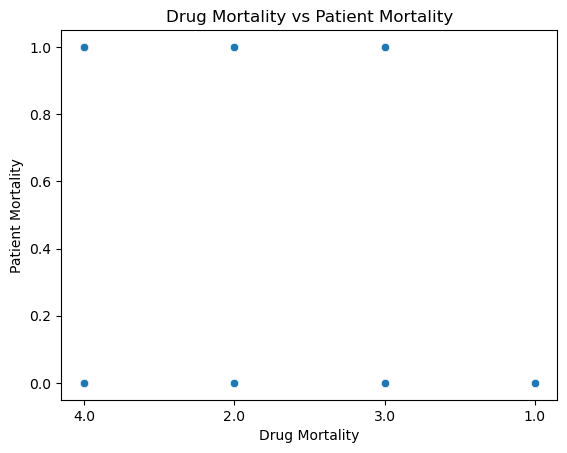

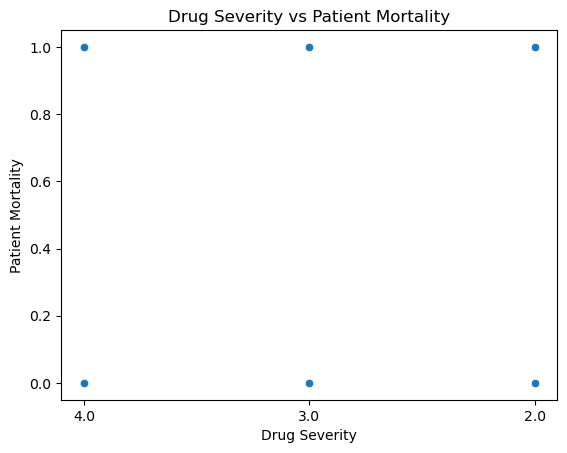

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for drug mortality vs patient mortality
sns.scatterplot(x='drug_mortality', y='patient_mortality', data=df_mortality)
plt.title('Drug Mortality vs Patient Mortality')
plt.xlabel('Drug Mortality')
plt.ylabel('Patient Mortality')
plt.show()

# Scatter plot for drug severity vs patient mortality
sns.scatterplot(x='drug_severity', y='patient_mortality', data=df_severity)
plt.title('Drug Severity vs Patient Mortality')
plt.xlabel('Drug Severity')
plt.ylabel('Patient Mortality')
plt.show()
